**과제**

아래 그림과 같은 학습 데이터에 대해서 선형회귀를 수행하시오.
(독립 변수로는 공부한 시간을 사용하고, 예측하고자 하는 결과값으로는 점수를 사용할 것. ex) 6 -> 53, 7->60)

그리고 학습된 모델을 이용하여 8.2시간 공부한 Brady라는 학생의 점수를 예측해보시오.

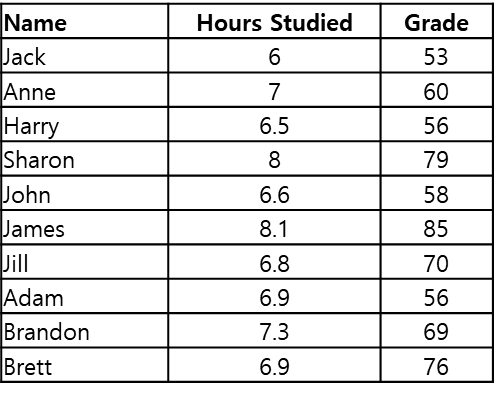

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
torch.manual_seed(1)

In [ ]:
# 데이터 셋 생성
x_train = torch.FloatTensor([[6],[7],[6.5],[8],[6.6],[8.1],[6.8],[6.9],[7.3],[6.9]])
y_train = torch.FloatTensor([[53], [60], [56], [79], [58], [85], [70], [56], [69], [76]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([10, 1])
torch.Size([10, 1])


In [ ]:
# 가중치 및 편향 생성
# W, b 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(W)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


In [ ]:
# 경사하강법 구현
optimizer = optim.SGD([W,b], lr=0.01976) # 최대한 빠르게 학습하도록 learning rate 조절

In [ ]:
# 경사하강법 반복 횟수
nb_epochs = 5000

In [ ]:
for epoch in range(nb_epochs + 1):
  # 가설 및 손실 함수 정의
  hypo = x_train * W + b
  cost = torch.mean((hypo-y_train)**2)
  # 경사하강법
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  # 100 epochs마다 로그 출력
  if epoch % 100 == 0:
    print(f'Epoch {epoch}/{nb_epochs} W: {W.item():.3f}, b: {b.item():.3f}, Cost: {cost.item():.6f}')

Epoch 0/5000 W: 18.558, b: 2.616, Cost: 4494.799805
Epoch 100/5000 W: 15.741, b: 1.099, Cost: 2094.874268
Epoch 200/5000 W: 13.874, b: -0.252, Cost: 987.923950
Epoch 300/5000 W: 12.650, b: -1.480, Cost: 477.206726
Epoch 400/5000 W: 11.861, b: -2.615, Cost: 241.439896
Epoch 500/5000 W: 11.367, b: -3.679, Cost: 132.471756
Epoch 600/5000 W: 11.072, b: -4.687, Cost: 81.988419
Epoch 700/5000 W: 10.911, b: -5.647, Cost: 58.487114
Epoch 800/5000 W: 10.839, b: -6.567, Cost: 47.440155
Epoch 900/5000 W: 10.828, b: -7.452, Cost: 42.148094
Epoch 1000/5000 W: 10.855, b: -8.306, Cost: 39.521164
Epoch 1100/5000 W: 10.909, b: -9.131, Cost: 38.133926
Epoch 1200/5000 W: 10.979, b: -9.930, Cost: 37.328438
Epoch 1300/5000 W: 11.060, b: -10.704, Cost: 36.800652
Epoch 1400/5000 W: 11.146, b: -11.454, Cost: 36.409828
Epoch 1500/5000 W: 11.236, b: -12.182, Cost: 36.090683
Epoch 1600/5000 W: 11.326, b: -12.888, Cost: 35.812511
Epoch 1700/5000 W: 11.417, b: -13.573, Cost: 35.560741
Epoch 1800/5000 W: 11.507, b:

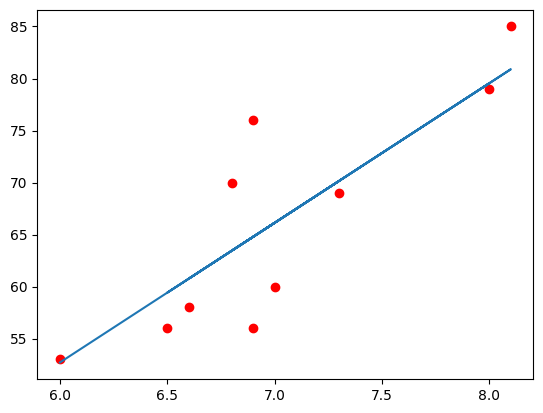

In [ ]:
def liner_regression(x):
    return x * W + b

plt.plot(x_train.detach().numpy(), y_train.detach().numpy(),'or', x_train.detach().numpy(), liner_regression(x_train).detach().numpy())
plt.show()


In [ ]:
# 선형 회귀 추론 코드 구현

test_data = torch.FloatTensor([[8.2]])
prediction = test_data * W + b
print(prediction)

tensor([[82.2317]], grad_fn=<AddBackward0>)


# 정답
- learning rate = 0.01976
- 경사하강법 반복횟수 = 5000
- 학습된 모델에 x = 8.2를 입력하니 예측값이 82.2317이 나왔습니다.
- 즉, 학습된 모델을 이용하여 8.2시간 공부한 Brady라는 학생의 점수는 약 82점으로 예측할 수 있습니다.
